<a href="https://colab.research.google.com/github/cz101/ML-TF/blob/main/TF2_0_SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

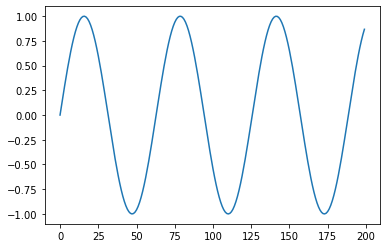

In [4]:
series = np.sin(0.1*np.arange(200)) #+np.random.randn(200)*0.1 
plt.plot(series)
plt.show()

In [6]:
#creating the data set
T=10
D=1
X= []
Y= []

for t in range (len(series)-T):
  x = series [t:t+T]
  X.append(x)
  y = series [t+T]
  Y.append(y)
X = np.array(X).reshape(-1,T,1) #The data set is N x D x T
Y = np.array(Y)
N = len(X)

print("X shape", X.shape, "Y shape", Y.shape)

X shape (190, 10, 1) Y shape (190,)


In [7]:
#built the autogregressive RNN model
i= Input(shape=(T,1))
x=SimpleRNN(5,activation='relu')(i)
x= Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer= Adam(lr=0.1),
)
r= model.fit(
    X[: -N//2],Y[: -N//2],
    epochs=80,
    validation_data=(X[-N//2:],Y[-N//2:])
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
3/3 [==============================] - 1s 131ms/step - loss: 0.9924 - val_loss: 0.1970
Epoch 2/80
3/3 [==============================] - 0s 21ms/step - loss: 0.1181 - val_loss: 0.0446
Epoch 3/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0505 - val_loss: 0.0784
Epoch 4/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0535 - val_loss: 0.0367
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0416 - val_loss: 0.0285
Epoch 6/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0327 - val_loss: 0.0292
Epoch 7/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0243 - val_loss: 0.0159
Epoch 8/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0160 - val_loss: 0.0077
Epoch 9/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0159 - val_loss: 0.0120
Epoch 10/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0125 - val_loss: 0.0069
Epoch 11/80
3/3 [===========

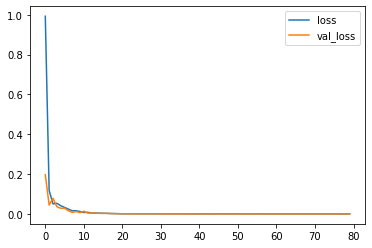

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [9]:
validation_target = Y[-N//2:]
validation_predictions =[]

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p= model.predict(last_x.reshape(1,-1))[0,0]
  validation_predictions.append(p)
  last_x= np.roll(last_x,-1)
  last_x[-1] =p

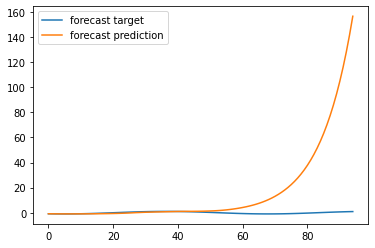

In [10]:
plt.plot(validation_target,label = 'forecast target')
plt.plot(validation_predictions,label='forecast prediction')
plt.legend()